In [40]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [41]:
train = pd.read_csv('train_housing_price_preprocessed.csv')
test = pd.read_csv('test_housing_price_preprocessed.csv')

In [42]:
train.columns

Index(['POSTED_BY_Builder', 'POSTED_BY_Dealer', 'POSTED_BY_Owner',
       'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'LONGITUDE', 'LATITUDE',
       'TARGET(PRICE_IN_LACS)', 'SQUARE_FT_LOG', 'BHK_RK', 'CITY', 'LOCALITY'],
      dtype='object')

In [43]:
#train_x = train.drop(columns=['TARGET(PRICE_IN_LACS)'])
train_x = train.drop(columns=['TARGET(PRICE_IN_LACS)','CITY','LOCALITY'])

In [44]:
train_y = train["TARGET(PRICE_IN_LACS)"]

,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),BHK_RK,CITY,LOCALITY


In [45]:
#test_x = test.drop(columns=["TARGET(PRICE_IN_LACS)"])
test_x = test.drop(columns=["TARGET(PRICE_IN_LACS)",'CITY','LOCALITY'])

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29050 entries, 0 to 29049
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY_Builder      29050 non-null  int64  
 1   POSTED_BY_Dealer       29050 non-null  int64  
 2   POSTED_BY_Owner        29050 non-null  int64  
 3   UNDER_CONSTRUCTION     29050 non-null  int64  
 4   RERA                   29050 non-null  int64  
 5   BHK_NO.                29050 non-null  int64  
 6   LONGITUDE              29050 non-null  float64
 7   LATITUDE               29050 non-null  float64
 8   TARGET(PRICE_IN_LACS)  29050 non-null  float64
 9   SQUARE_FT_LOG          29050 non-null  float64
 10  BHK_RK                 29050 non-null  int64  
 11  CITY                   29050 non-null  object 
 12  LOCALITY               29039 non-null  object 
dtypes: float64(4), int64(7), object(2)
memory usage: 2.9+ MB


In [47]:
model=LinearRegression()
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
pred_train=model.predict(train_x)
pred_test=model.predict(test_x)

In [49]:
pred_train = abs(pred_train)
pred_test = abs(pred_test)

In [50]:
RMSLE = np.sqrt(mean_squared_log_error(train_y,pred_train))
print('RMSLE of train',RMSLE)

RMSLE of train 1.4494432185585646


In [24]:
#score=cross_val_score(model,train_x,train_y,cv=10,scoring='neg_mean_squared_log_error')

In [55]:
test_x.

,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,UNDER_CONSTRUCTION,RERA,BHK_NO.,LONGITUDE,LATITUDE,SQUARE_FT_LOG,BHK_RK
POSTED_BY_Builder,1.000000,-0.180755,-0.107298,0.187319,0.121520,-0.021260,-0.026272,3.392203e-03,-0.022546,-3.539902e-02
POSTED_BY_Dealer,-0.180755,1.000000,-0.958455,0.174763,0.235704,0.108367,0.067546,-3.750127e-02,0.133628,-1.049967e-02
POSTED_BY_Owner,-0.107298,-0.958455,1.000000,-0.230990,-0.273511,-0.103380,-0.060662,3.692540e-02,-0.128543,2.088032e-02
UNDER_CONSTRUCTION,0.187319,0.174763,-0.230990,1.000000,0.363535,-0.034652,0.011269,3.481664e-03,-0.043783,-1.939750e-02
RERA,0.121520,0.235704,-0.273511,0.363535,1.000000,0.009514,0.103211,-7.180131e-02,0.030177,-5.000248e-03
BHK_NO.,-0.021260,0.108367,-0.103380,-0.034652,0.009514,1.000000,0.069663,5.092082e-02,0.654801,4.666666e-02
LONGITUDE,-0.026272,0.067546,-0.060662,0.011269,0.103211,0.069663,1.000000,-1.430104e-01,0.036495,-8.448559e-03
LATITUDE,0.003392,-0.037501,0.036925,0.003482,-0.071801,0.050921,-0.143010,1.000000e+00,0.026434,-5.508794e-08
SQUARE_FT_LOG,-0.022546,0.133628,-0.128543,-0.043783,0.030177,0.654801,0.036495,2.643442e-02,1.000000,5.746802e-02
BHK_RK,-0.035399,-0.010500,0.020880,-0.019398,-0.005000,0.046667,-0.008449,-5.508794e-08,0.057468,1.000000e+00


ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

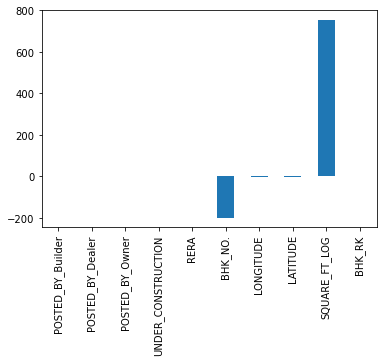

In [53]:
model=Lasso(alpha=30)
run_model(model, train_x, train_y, test_x, "test_result_Lasso_regression.csv" )

In [52]:
def run_model(model, train_X, train_y, test_X,filename ):
    model.fit(train_x, train_y)
    pd.Series(model.coef_,index=test_x.columns).plot(kind = "bar")
    pred_train = model.predict(train_x)
    pred_test = model.predict(test_x)
    pred_test = abs(pred_train)
    RMSLE = np.sqrt(mean_squared_log_error(train_y,pred_train))
    print('RMSLE of train',RMSLE)
   # score = cross_val_score(model, train_x, train_y, cv = 10, scoring = "neg_root_mean_squared_error" )
   # print("Cross validation Score  = ",np.mean(np.abs(score)))
   # sample["Item_Outlet_Sales"] = pred_test
   # sample.to_csv(filename, index = False)

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

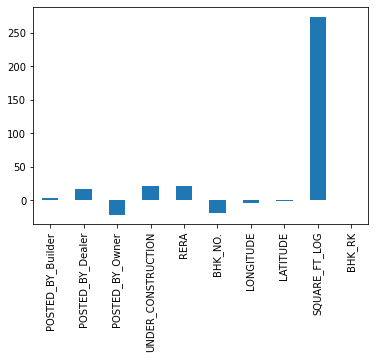

In [54]:
model = ElasticNet(alpha=1, l1_ratio=0.5)
run_model(model, train_x, train_y, test_x, "test_result_ElasticNet_regression.csv" )